# Bharat Intern Task 2: Titanic Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Asus1/Downloads/train (1).csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 ## Analysing data

<AxesSubplot:xlabel='Survived', ylabel='count'>

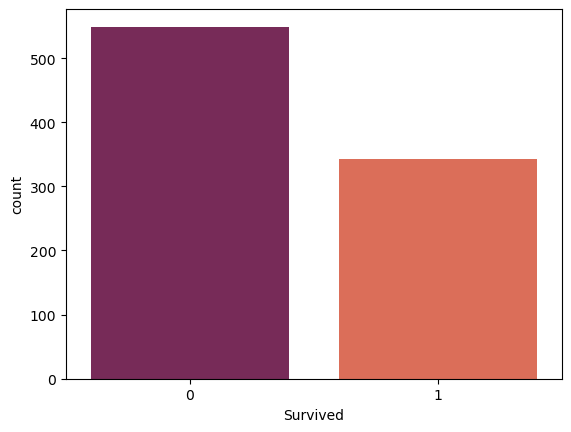

In [5]:
sns.countplot(x='Survived', data= data, palette="rocket")

Those who did not survived(more than 500) are greater than who survied (around 300)

<AxesSubplot:xlabel='Survived', ylabel='count'>

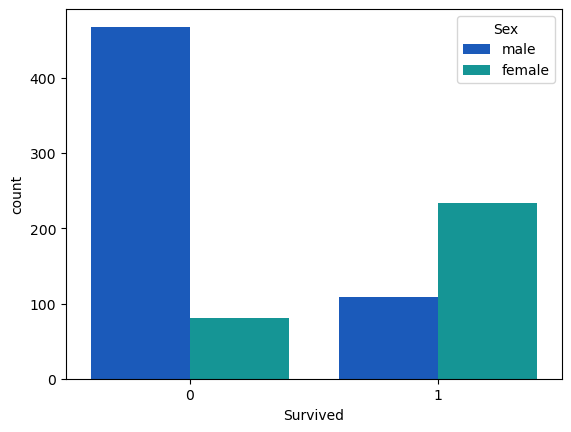

In [6]:
sns.countplot(x="Survived",hue = "Sex", data=data, palette='winter')

Here We can see that women are thrice more likely to survive than males.

<AxesSubplot:xlabel='Survived', ylabel='count'>

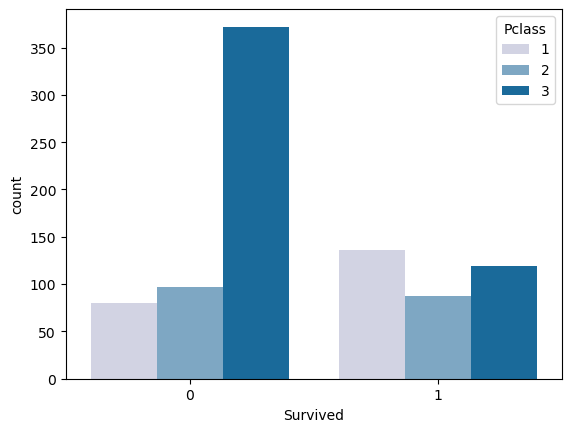

In [7]:
sns.countplot(x="Survived", hue = "Pclass", data=data, palette = 'PuBu')

The passangers who did not survived are more in 3rd class. Whereas 1st class passangers are more likely to survive.

<AxesSubplot:xlabel='Age', ylabel='Count'>

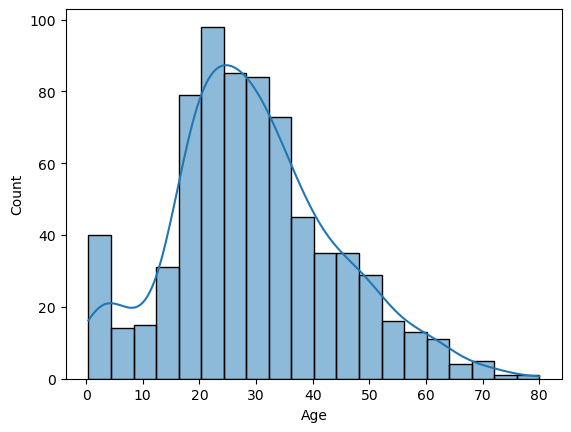

In [8]:
sns.histplot(data['Age'],kde= True)

We can see that most of people are between 20-40 and very few are between 70-80.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

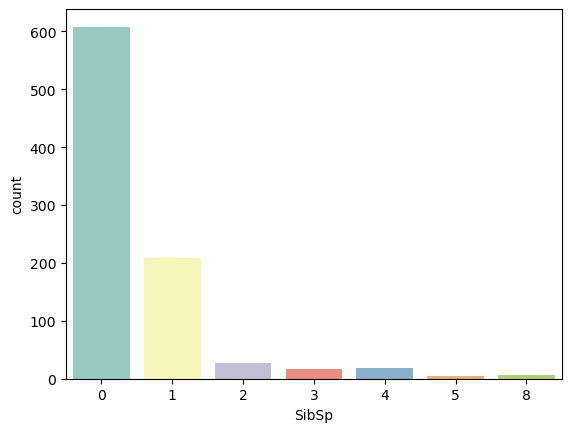

In [9]:
sns.countplot(x='SibSp', data= data, palette = "Set3")

Most of passangers do not have their siblings onborad.

<AxesSubplot:xlabel='Parch', ylabel='count'>

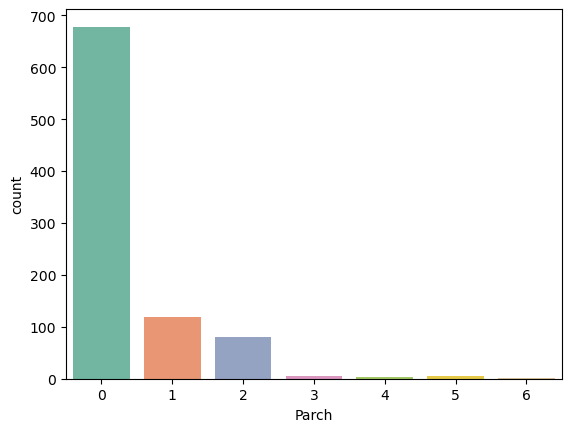

In [10]:
sns.countplot(x='Parch', data= data, palette = "Set2")

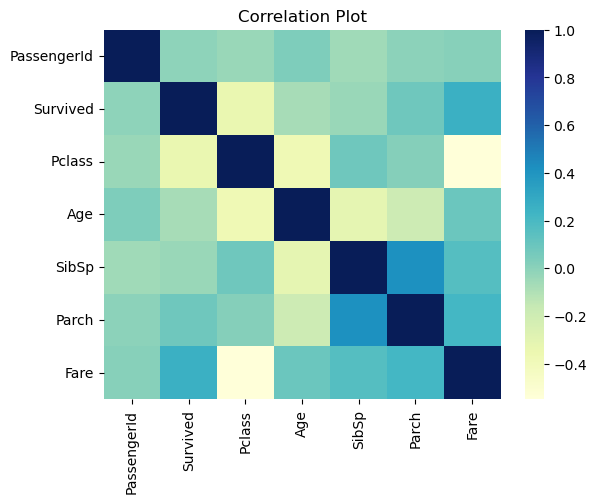

In [11]:
# Correlation Plot
sns.heatmap(data.corr(),cmap ="YlGnBu")
plt.title('Correlation Plot')
plt.show()

## Data Cleaning

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Dropping Unwanted columns
data.drop(['Cabin','Name','PassengerId','Ticket'],axis=1,inplace=True)

In [14]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
# Drop null values
data.dropna(inplace=True)

In [16]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now we don't have any null values

In [17]:
data.shape

(712, 8)

In [18]:
# Encoding the data
Sex = pd.get_dummies(data['Sex'],drop_first=True)
Sex.head(3)

,male
0,1
1,0
2,0


Here Male is 1 and Female is 0.

In [19]:
ordinal_mapping = {'Q': 1, 'S': 2, 'C': 3}
data['Embarked']=data['Embarked'].map(ordinal_mapping)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,3
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2


'C' stands Cherbourg, 'Q' stands for Queenstown, 'S' stands for Southhampton.

In [20]:
# Now we concat and remove the catagorical data

data = pd.concat([data,Sex],axis=1)

In [21]:
data = data.drop(['Sex'],axis = 1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,3,0
2,1,3,26.0,0,0,7.9250,2,0
3,1,1,35.0,1,0,53.1000,2,0
4,0,3,35.0,0,0,8.0500,2,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   male      712 non-null    uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 45.2 KB


## Training Data

In [23]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [24]:
from imblearn.over_sampling import SMOTE

#Creating an Instance
smote = SMOTE(sampling_strategy='auto',random_state=None)

#Apply SMOTE to generate syntheic samples
X, y =smote.fit_resample(X, y)
df = pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)

# Checking the value count
df['Survived'].value_counts()

0    424
1    424
Name: Survived, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## SVM

In [27]:
from sklearn.svm import SVC

s_v_c = SVC(kernel='rbf')
s_v_c.fit(X_train,y_train)
y_pred_svc = s_v_c.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
cm = confusion_matrix(y_test,y_pred_svc)

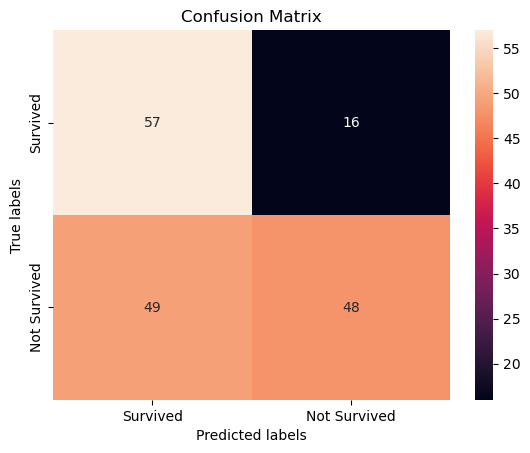

In [30]:
# Confusion Matrix

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Survived', 'Not Survived']); ax.yaxis.set_ticklabels(['Survived', 'Not Survived']);

In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_test,y_pred_svc)*100,'%')

Accuracy:  61.76470588235294 %


## Decision Tree

In [32]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtc_entropy= DecisionTreeClassifier(criterion = "entropy", random_state=100, max_depth=4)
dtc_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=100)

In [33]:
pred_en = dtc_entropy.predict(X_test)

In [34]:
cm1 = confusion_matrix(y_test,pred_en)

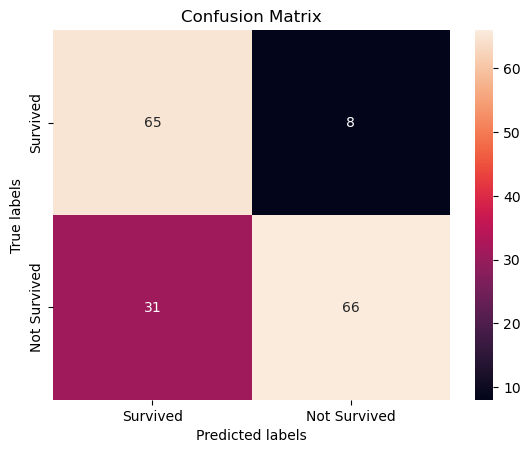

In [35]:
# Confusion Matrix

ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Survived', 'Not Survived']); ax.yaxis.set_ticklabels(['Survived', 'Not Survived']);

In [37]:
print('Accuracy: ',accuracy_score(y_test,pred_en)*100,'%')

Accuracy:  77.05882352941177 %


## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()
Lr.fit(X_train, y_train)

C:\Users\Asus1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred_lr = Lr.predict(X_test)

In [40]:
cm2 = confusion_matrix(y_test,y_pred_lr)

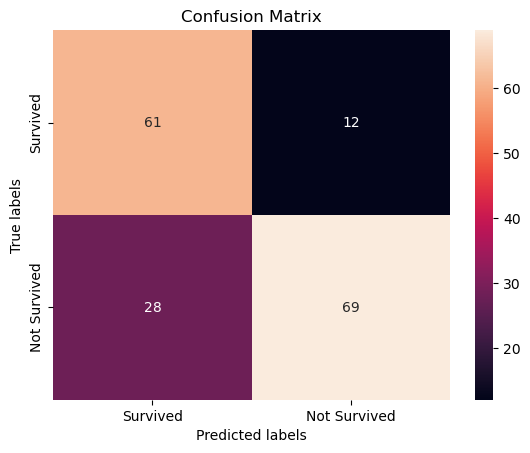

In [41]:
# Confusion Matrix

ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Survived', 'Not Survived']); ax.yaxis.set_ticklabels(['Survived', 'Not Survived']);

In [42]:
print('Accuracy: ',accuracy_score(y_test,y_pred_lr)*100,'%')

Accuracy:  76.47058823529412 %
